NFL DRAFT ANALYSIS 

In [70]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

draft = pd.read_csv("C:/Users/brand/OneDrive/Documents/Data Sets/nfl_draft.csv")
#Drop unnecssary columns
draft.drop(['column_a', 'player_id'], inplace= True, axis = 1)
#All inputs to hof are no so it was removed for lack of valuable information 
draft.drop('hof', inplace = True, axis = 1)


#Data was lost in transferring the player_id so a custom player_id was made
draft['player_id'] = draft['player'] + "_" + draft['year'].astype(str) + "_" + draft['tm']


In [53]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)  # Removes width limit
pd.set_option('display.max_colwidth', None)  # Show full content of each cell

# pd.reset_option('all')


In [3]:
#Split the data up into positional groups for ease of cleaning 

# positions = ['QB', 'OLB', 'WR', 'T', 'DE', 'RB', 'CB', 'NT', 'DT', 'C', 'G', 'FS', 'ILB', 'SS', 'TE', 'FB', 'S', 'P', 'LS', 'LB', 'OL', 'DB','K', 'DL', 'KR']

# Quaterbacks = draft[draft['pos'] == 'QB']
# Quaterbacks.drop(['column_a','player_id','position_standard', 'sk', 'to', 'tkl', 'def_int', 'ap1', 'pb', 'st', 'rec_yds', 'rec', 'rec_tds'], inplace=True, axis = 1)

# print(draft.columns)
# print(draft["player"].unique())
# draft['column_a'].unique()

Data Wrangling/ Cleaning

In [71]:
# Consolidate to 32 teams replacing old team abbreviations with the new ones 
draft['tm'] = draft['tm'].replace({
    'PHO': 'ARI',
    'OAK': 'RAI',
    'STL': 'PIT'
})

# Fill in missing ages with the median age 
draft['age'] = draft['age'].fillna(round(draft['age'].median()))

# The to variable seems to be incomplete but through some EDA it seems most of those players do not have games played (g) numbers so I will be 
# cautious and replace the missing values with the year they were drafted 
draft['to'] = draft['to'].fillna(draft['year'])

# Replace missing stats with 0 assuming the player never attempted or accomplished one in his career 

stats_with_na = ['carav', 'drav', 'g', 'cmp',
       'pass_att', 'pass_yds', 'pass_td', 'pass_int', 'rush_att', 'rush_yds',
       'rush_tds', 'rec', 'rec_yds', 'rec_tds', 'tkl', 'def_int', 'sk']


for stat in stats_with_na: 
    draft[stat] = draft[stat].fillna(0)

print(draft.isnull().sum())

# Note: Some players have missing values for college_univ. 
# These may represent players who did not attend college, transferred between schools, or missing data from the source. 
# I leave these values as missing and exclude them from any college-based analysis.”

year                    0
rnd                     0
pick                    0
tm                      0
player                  0
pos                     0
position_standard       0
first4av                0
age                     0
to                      0
ap1                     0
pb                      0
st                      0
carav                   0
drav                    0
g                       0
cmp                     0
pass_att                0
pass_yds                0
pass_td                 0
pass_int                0
rush_att                0
rush_yds                0
rush_tds                0
rec                     0
rec_yds                 0
rec_tds                 0
tkl                     0
def_int                 0
sk                      0
college_univ         3430
player_id               0
dtype: int64


Exploratory Data Analysis

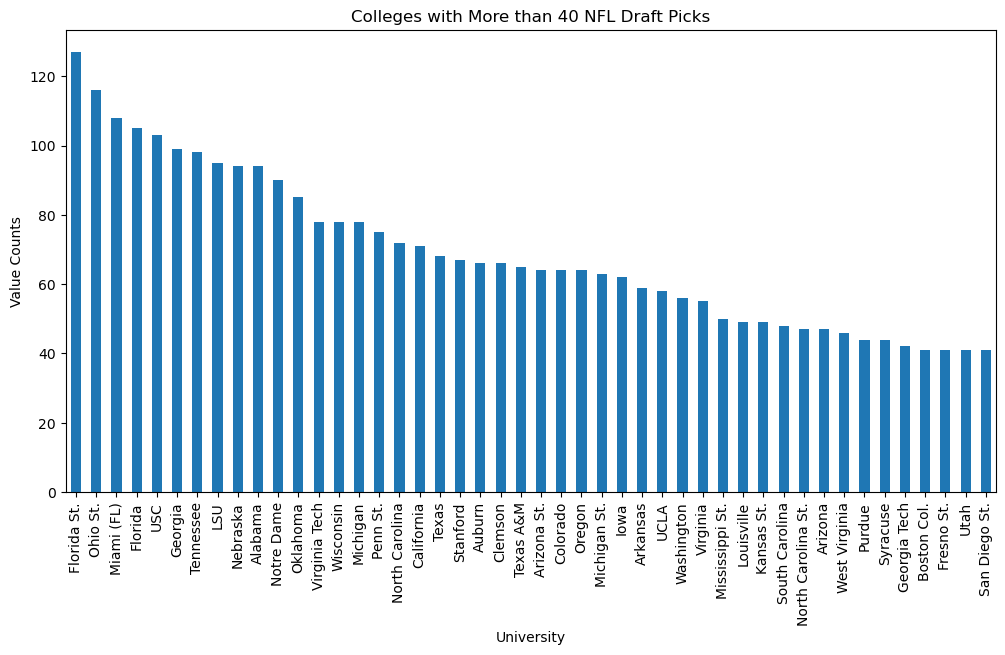

In [72]:
#Examining which universities have the most athletes selected by the NFL 
colleges = draft['college_univ'].value_counts()
colleges = colleges[colleges >= 40]

plt.figure(figsize=(12,6))

colleges.plot(kind='bar')

plt.xlabel('University')
plt.ylabel('Value Counts')
plt.title('Colleges with More than 40 NFL Draft Picks')
plt.show()

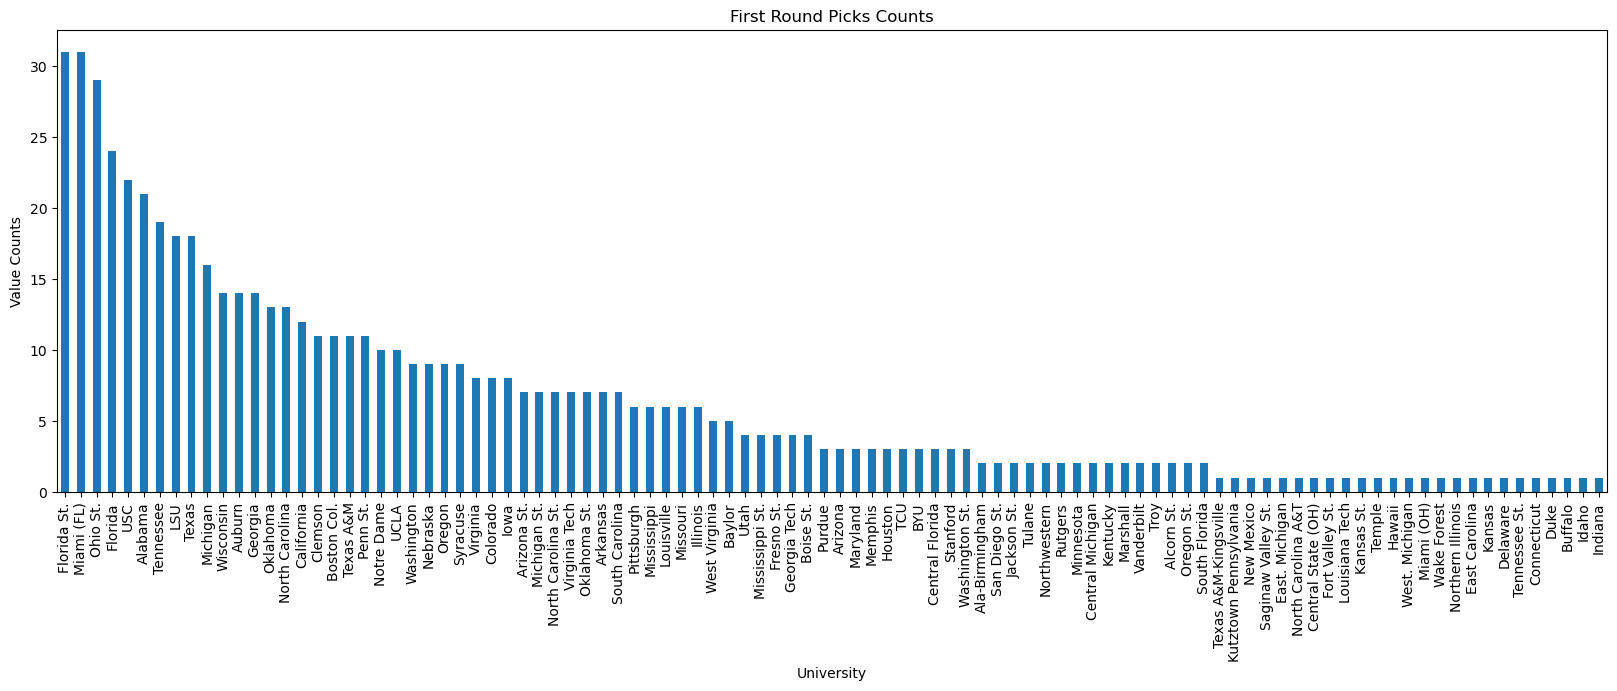

In [69]:
#Examining which universities produce the most first round picks
college_round = draft[draft['rnd'] == 1]['college_univ'].value_counts()

plt.figure(figsize=(20,6))
college_round.plot(kind='bar')
plt.xlabel('University')
plt.ylabel('Value Counts')
plt.title('First Round Picks Counts')
plt.show()

In [ ]:
#Find correlations between position and draft status 
#Quaterback_correlation = draft['pos'].corr(draft['rnd'])


qbs = draft[draft['pos'] == 'QB']
olbs = draft[draft['pos'] == 'OLB']
wrs = draft[draft['pos'] == 'WR']
tackles = draft[draft['pos'] == 'T']
DEs = draft[draft['pos'] == 'DE']
RBs = draft[draft['pos'] == 'RB']
cbs = draft[draft['pos'] == 'CB']
nt = draft[draft['pos'] == 'NT']
dt = draft[draft['pos'] == 'DT']
centers = draft[draft['pos'] == 'C']
gaurds = draft[draft['pos'] == 'G']
fs = draft[draft['pos'] == 'FS']
saftey = draft[draft['pos'] == 'S']
punters = draft[draft['pos'] == 'P']
ls = draft[draft['pos'] == 'LS']
ol = draft[draft['pos'] == 'OL']
dbs = draft[draft['pos'] == 'DB']
kickers = draft[draft['pos'] == 'K']
dl = draft[draft['pos'] == 'DL']
kr = draft[draft['pos'] == 'KR']


from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Name", "Age", "City"]
table.add_row(["Alice", 30, "New York"])
table.add_row(["Bob", 24, "London"])
print(table)

array(['QB', 'OLB', 'WR', 'T', 'DE', 'RB', 'CB', 'NT', 'DT', 'C', 'G',
       'FS', 'ILB', 'SS', 'TE', 'FB', 'S', 'P', 'LS', 'LB', 'OL', 'DB',
       'K', 'DL', 'KR'], dtype=object)

In [66]:
utahstate = draft[draft['college_univ'] == 'Utah']['pos'].value_counts()
utahstate

utah = draft[(draft['rnd'] == 3) & (draft['college_univ'] == 'Utah')]
utah

,year,rnd,pick,tm,player,pos,position_standard,first4av,age,to,ap1,pb,st,carav,drav,g,cmp,pass_att,pass_yds,pass_td,pass_int,rush_att,rush_yds,rush_tds,rec,rec_yds,rec_tds,tkl,def_int,sk,college_univ,player_id
65,2015,3,66,TEN,Jeremiah Poutasi,G,G,4,21.0,2015.0,0,0,0,4.0,4.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Utah,Jeremiah Poutasi_2015_TEN
860,2012,3,95,RAI,Tony Bergstrom,T,T,3,26.0,2016.0,0,0,0,3.0,3.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Utah,Tony Bergstrom_2012_OAK
2633,2005,3,88,NYJ,Sione Pouha,DT,DT,21,26.0,2012.0,0,0,4,50.0,50.0,106.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,192.0,0.0,4.5,Utah,Sione Pouha_2005_NYJ
3404,2002,3,87,WAS,Cliff Russell,WR,WR,0,23.0,2008.0,0,0,0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,3.0,15.0,0.0,5.0,45.0,0.0,2.0,0.0,0,Utah,Cliff Russell_2002_WAS
3652,2001,3,74,CAR,Steve Smith,WR,WR,43,22.0,2016.0,2,5,12,101.0,92.0,213.0,0.0,1.0,0.0,0.0,0.0,57.0,387.0,2.0,1005.0,14448.0,79.0,42.0,0.0,0,Utah,Steve Smith_2001_CAR


In [7]:
Qbs['pass_yds'].corr(Qbs['pick'])
plt.scatter(Qbs['pass_yds'], Qbs['pick'])
plt.xlabel("Passing Yards")
plt.ylabel("Draft Pick")
plt.title("Scatter Plot: Passing Yards vs Draft Pick")
plt.show()

NameError: name 'Qbs' is not defined

<function matplotlib.pyplot.show(close=None, block=None)>

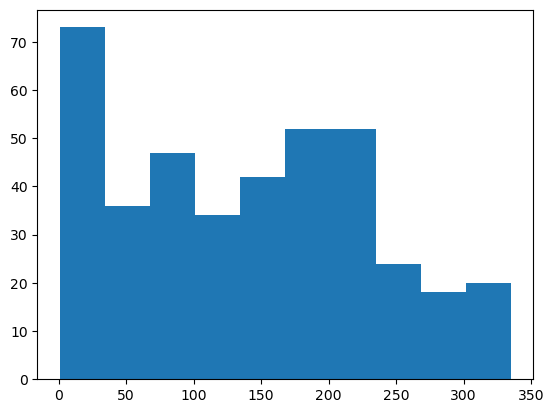

In [ ]:
plt.hist(Qbs['pick'])
plt.show

In [ ]:
draft['pos_numeric'] = draft['pos'].astype('category').cat.codes
draft

draft['pick'].corr(draft['pos_numeric'])

0.02511978423486256